## 전처리

In [ ]:
# 패키지 가져오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as rn
import seaborn as sns

In [17]:
# 필요한 라이브러리 설치
# pip install xgboost
# pip install scikit-learn

import pandas as pd
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# 데이터셋 불러오기
train = pd.read_csv('train.csv', header=None)
train_label = pd.read_csv('trainLabels.csv', header=None)
test = pd.read_csv('test.csv', header=None)
# XGBoost 모델 훈련
xgb = XGBClassifier()
xgb.fit(train, train_label)

# SVC 모델 훈련
svc = SVC(probability=True) # 확률 예측을 위해 probability를 True로 설정
svc.fit(train, train_label)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(probability=True)

In [23]:

# XGBoost 모델을 사용한 예측
xgb_predictions = xgb.predict(test)

# SVC 모델을 사용한 예측
svc_predictions = svc.predict(test)
# XGBoost 예측 결과 저장
xgb_results = pd.DataFrame(xgb_predictions, columns=['Solution'])
xgb_results.index = xgb_results.index + 1
xgb_results.index.name = "Id"


svc_results = pd.DataFrame(svc_predictions, columns=['Solution'])
svc_results.index = svc_results.index + 1
svc_results.index.name = "Id"

In [26]:
xgb_results

,Solution
Id,
1,1
2,0
3,0
4,0
5,0
...,...
8996,1
8997,1
8998,1


In [27]:
svc_results

,Solution
Id,
1,1
2,0
3,1
4,0
5,0
...,...
8996,1
8997,1
8998,1


In [29]:

xgb_results.to_csv('xgb_predictions_raw.csv', index=True)
svc_results.to_csv('svc_predictions_raw.csv', index=True)


In [9]:
# 훈련 데이터와 테스트 데이터의 피처 이름 확인
print("훈련 데이터 피처:", train.columns)
print("테스트 데이터 피처:", test.columns)

# 테스트 데이터에만 존재하는 피처 제거
test_aligned = test[train.columns]

# XGBoost 모델을 사용한 예측 (피처 이름을 맞춘 후)
xgb_predictions = xgb.predict(test_aligned)

# 위와 같은 방식으로 SVC 모델 예측을 진행


훈련 데이터 피처: Index(['0.29940251144353242', '-1.2266241875260637', '1.4984250500215328',
       '-1.1761503610375272', '5.2898525545597037', '0.20829711393323402',
       '2.4044983672405826', '1.5945062220589785', '-0.051608163273514231',
       '0.66323431039687908', '-1.4083700642531511', '1.1147436351160869',
       '0.91041530967390116', '2.2181103179158135', '4.3056427290235391',
       '0.088923978050666208', '0.1691492586690862', '0.41344763764684195',
       '1.5138621708864943', '2.6629665829474161', '-1.0727654812214888',
       '0.14911112051014644', '0.55957919164070269', '4.3788846423749064',
       '-0.4636026556416834', '-0.063959155289009084', '0.54493030536966891',
       '0.71277166708074502', '-1.4940501263538932', '-2.6361688752136554',
       '-0.85046544625016463', '-0.62298999638261954', '-1.8330573433160038',
       '0.29302438506869571', '3.5526813410266507', '0.71761099417552265',
       '3.3059719748508889', '-2.7155588147154619', '-2.6824085866346223',
       

KeyError: "None of [Index(['0.29940251144353242', '-1.2266241875260637', '1.4984250500215328',\n       '-1.1761503610375272', '5.2898525545597037', '0.20829711393323402',\n       '2.4044983672405826', '1.5945062220589785', '-0.051608163273514231',\n       '0.66323431039687908', '-1.4083700642531511', '1.1147436351160869',\n       '0.91041530967390116', '2.2181103179158135', '4.3056427290235391',\n       '0.088923978050666208', '0.1691492586690862', '0.41344763764684195',\n       '1.5138621708864943', '2.6629665829474161', '-1.0727654812214888',\n       '0.14911112051014644', '0.55957919164070269', '4.3788846423749064',\n       '-0.4636026556416834', '-0.063959155289009084', '0.54493030536966891',\n       '0.71277166708074502', '-1.4940501263538932', '-2.6361688752136554',\n       '-0.85046544625016463', '-0.62298999638261954', '-1.8330573433160038',\n       '0.29302438506869571', '3.5526813410266507', '0.71761099417552265',\n       '3.3059719748508889', '-2.7155588147154619', '-2.6824085866346223',\n       '0.10105047232890663'],\n      dtype='object')] are in the [columns]"

In [ ]:
# 데이터 읽기
train = pd.read_csv("train.csv",header=None)
test = pd.read_csv("test.csv",header=None)
train_label = pd.read_csv("trainLabels.csv",header=None)
print('Train data size : ', train.shape)
print('Test data size : ', test.shape)
print('Train label data size : ', train_label.shape)

Train data size :  (1000, 40)
Test data size :  (2619, 40)
Train label data size :  (1000, 1)


In [ ]:
# train 데이터 구조 확인
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1000 non-null   float64
 1   1       1000 non-null   float64
 2   2       1000 non-null   float64
 3   3       1000 non-null   float64
 4   4       1000 non-null   float64
 5   5       1000 non-null   float64
 6   6       1000 non-null   float64
 7   7       1000 non-null   float64
 8   8       1000 non-null   float64
 9   9       1000 non-null   float64
 10  10      1000 non-null   float64
 11  11      1000 non-null   float64
 12  12      1000 non-null   float64
 13  13      1000 non-null   float64
 14  14      1000 non-null   float64
 15  15      1000 non-null   float64
 16  16      1000 non-null   float64
 17  17      1000 non-null   float64
 18  18      1000 non-null   float64
 19  19      1000 non-null   float64
 20  20      1000 non-null   float64
 21  21      1000 non-null   float64
 22  2

In [ ]:
# train 데이터 분포 확인
print(train.describe())

                0            1            2            3            4   \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      0.025596    -0.024526    -0.024088    -0.002271     1.092329   
std       1.008282     1.016298     0.979109     0.970575     4.538834   
min      -3.365711    -3.492086    -2.695602    -3.460471   -16.421901   
25%      -0.669010    -0.693937    -0.698830    -0.617557    -1.801997   
50%       0.027895    -0.033194     0.008145     0.002327     0.862818   
75%       0.762520     0.682753     0.661434     0.640743     3.843172   
max       3.326246     3.583870     2.546507     3.088738    17.565345   

                5            6            7            8            9   ...  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000  ...   
mean     -0.006250     0.497342    -0.037883     0.026391    -0.003597  ...   
std       0.989128     2.118819     2.232256     1.001064     1.013520  ...   
min      -3.04125

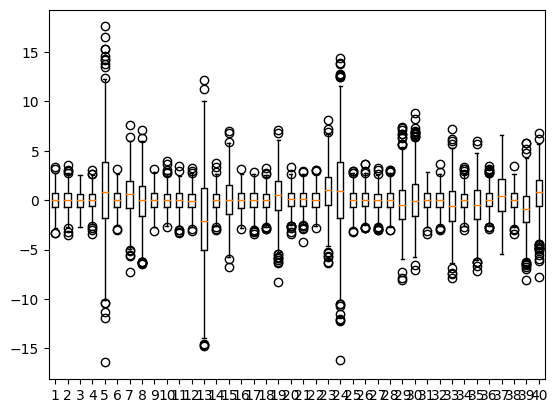

In [ ]:
# train 데이터 박스플롯
plt.boxplot(train)
plt.show()

<Axes: >

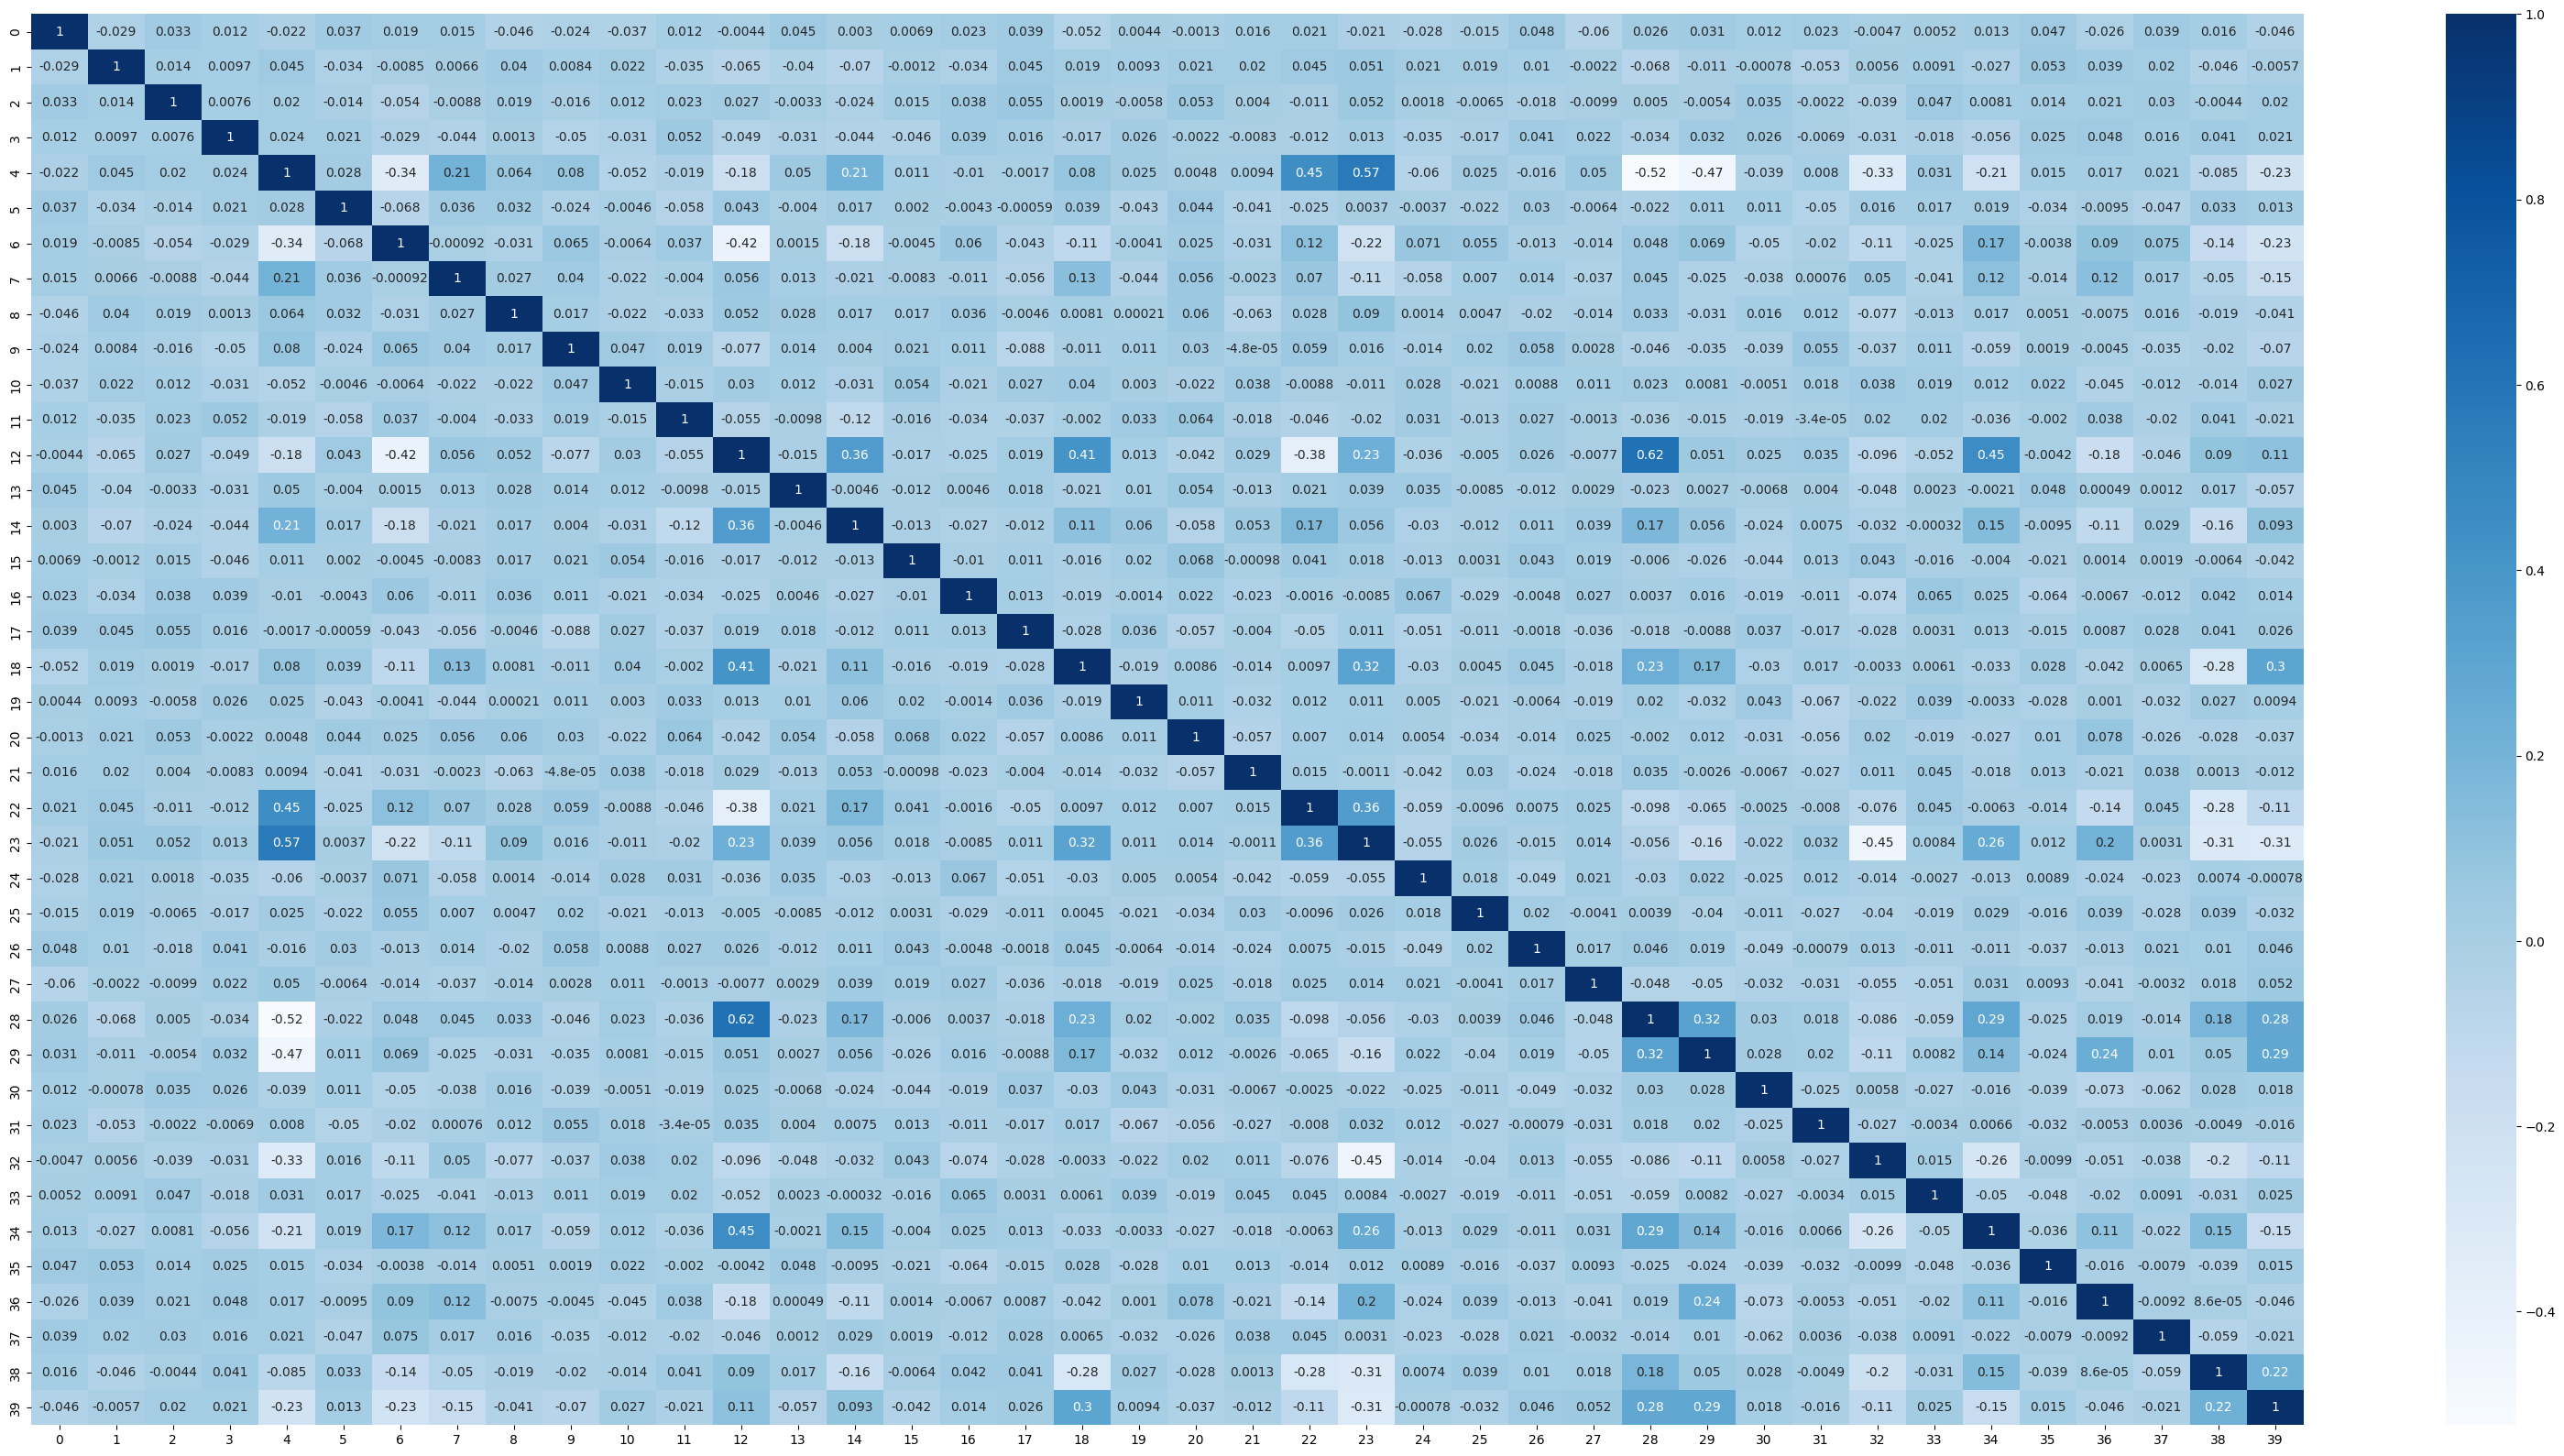

In [ ]:
# train 데이터의 설명변수 간 상관관계를 나타낸 히트맵
cor=train.corr()
plt.figure(figsize=(40,20))
sns.heatmap(cor, annot=True, cmap='Blues')

In [ ]:
# train 데이터와 validation 데이터로 분리
from sklearn.model_selection import train_test_split
train_label = np.ravel(train_label)
Xtrain, Xval, ytrain, yval = train_test_split(train, train_label, random_state=1, test_size=0.2)
print(Xtrain.shape)
print(Xval.shape)
print(ytrain.shape)
print(yval.shape)

(800, 40)
(200, 40)
(800,)
(200,)


## 모델링

In [ ]:
!pip install optuna


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 379.9/379.9 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 8.6 MB/s eta 0:00:00


In [ ]:
import optuna
from sklearn.model_selection import cross_val_score

# XGBoost 목적 함수 정의
def objective_xgb(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 9),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
    }
    xgb = XGBClassifier(**params)
    return cross_val_score(xgb, norm_train_data, train_label, cv=10).mean()

# XGBoost 최적화 실행
study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective_xgb, n_trials=30)
print('Best XGBoost parameters:', study_xgb.best_params)

# SVC 목적 함수 정의
def objective_svc(trial):
    params = {
        'C': trial.suggest_float('C', 0.1, 10),
        'gamma': trial.suggest_categorical('gamma', ['scale', 'auto']),
        'kernel': trial.suggest_categorical('kernel', ['rbf', 'poly', 'sigmoid'])
    }
    svc = SVC(**params)
    return cross_val_score(svc, norm_train_data, train_label, cv=10).mean()

# SVC 최적화 실행
study_svc = optuna.create_study(direction='maximize')
study_svc.optimize(objective_svc, n_trials=100)
print('Best SVC parameters:', study_svc.best_params)


[I 2024-03-27 10:44:39,014] A new study created in memory with name: no-name-8a8646c4-7e7e-4d82-8a49-dd7a7482aa4b
[I 2024-03-27 10:44:44,022] Trial 0 finished with value: 0.8699999999999999 and parameters: {'n_estimators': 567, 'max_depth': 5, 'learning_rate': 0.2812255015660859, 'subsample': 0.6568198743958953, 'colsample_bytree': 0.5061421683043097}. Best is trial 0 with value: 0.8699999999999999.
[I 2024-03-27 10:44:52,276] Trial 1 finished with value: 0.881 and parameters: {'n_estimators': 758, 'max_depth': 5, 'learning_rate': 0.26111727008368696, 'subsample': 0.7977033258136925, 'colsample_bytree': 0.8625457745454126}. Best is trial 1 with value: 0.881.
[I 2024-03-27 10:45:00,947] Trial 2 finished with value: 0.8800000000000001 and parameters: {'n_estimators': 422, 'max_depth': 4, 'learning_rate': 0.16738156886306954, 'subsample': 0.55833062247273, 'colsample_bytree': 0.7992287735922445}. Best is trial 1 with value: 0.881.
[I 2024-03-27 10:45:18,752] Trial 3 finished with value: 0

KeyboardInterrupt: 

In [ ]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.svm import SVC

# 데이터 불러오기
test_data = pd.read_csv('test.csv')
norm_test_data = (test_data - test_data.mean()) / test_data.std()  # 데이터 정규화

# 최적의 파라미터로 모델 생성 및 학습
best_xgb_params = study_xgb.best_params
xgb_model = XGBClassifier(**best_xgb_params)
xgb_model.fit(norm_train_data, train_label)

best_svc_params = study_svc.best_params
svc_model = SVC(**best_svc_params)
svc_model.fit(norm_train_data, train_label)

# 예측
xgb_predictions = xgb_model.predict(norm_test_data)
svc_predictions = svc_model.predict(norm_test_data)

# 예측 결과 저장 또는 출력
pd.DataFrame(xgb_predictions, columns=['XGB Predictions']).to_csv('xgb_predictions.csv', index=False)
pd.DataFrame(svc_predictions, columns=['SVC Predictions']).to_csv('svc_predictions.csv', index=False)
